<a href="https://colab.research.google.com/github/cgpilapanta/timeseries/blob/main/TEG_Cap_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CAPÍTULO 02. Função de covariância e correlação**
---
*   Autor: Christian G. Pilapanta A.
*   Data : Agosto de 2024
*   Lotação: Departamento de Geomática - UFPR / Laboratorio de Geodésia Espacial e Hidrografia

---

**Definição do entorno de trabalho e Importação de dados**

In [ ]:
# Instalar bibliotecas de R necessárias para rodar o código
install.packages("astsa")
install.packages("EMD")
install.packages("spam")
install.packages("locfit")

In [ ]:
# Inicializar bibliotecas de R necessárias para rodar o código
library(astsa)
library(EMD)

## **2.1. Covariância e correlação. Definição**

### **2.1.1. Função covariância**
Em teoria da probabilidade e na estatística, a covariância, ou variância conjunta (em inglês: joint variance), é uma medida do grau de interdependência (ou inter-relação) numérica entre duas variáveis aleatórias.

Para duas variáveis ​​discretas de $N$ elementos $x(n) = \{x_n\}$ e $y(n) = \{y_n\}$ onde $n = 0, 1, ..., N-1$, a função covariância é definida como:

$$cov\left ( x,y \right )=\frac{1}{N}\sum_{n=0}^{N-1}\left ( x_{n}-\bar{x} \right )\left ( y_{n}-\bar{y}\right )$$

onde $\bar{x}$ e $\bar{y}$ são as médias aritméticas de $x\left ( n \right )$ e $y\left ( n \right )$ respectivamente.

### **2.1.2. Correlação Produto-Momento**

A correlação produto-momento é definida em termos da covariância normalizada (i.e. covariância dividida pelo produto dos desvios padrão). Portanto, considerando a função covariância, o coeficiente de correlação de Pearson é definido como:

$$R=\frac{cov\left ( x,y \right )}{sd\left ( x \right )\cdot sd\left ( y \right )}$$

onde $sd\left ( x \right )$ e $sd\left ( y \right )$ são os desvios padrão de $x\left ( n \right )$ e $y\left ( n \right )$ respectivamente, e $-1\leq R\leq 1$.

**Importante:**

* Tanto a **função covariância** quanto a **correlação produto-momento** podem fornecer uma medida da força de uma associação entre as duas variáveis $x\left ( n \right )$ e $y\left ( n \right )$, entretanto, não é necessariamente o caso de uma forte covariância ou correlação indicar uma associação entre as variáveis (i.e. as vézes pode surgir uma forte correlação entre variáveis que não tem uma associação real).

## **2.2. Interpretação do Coeficiente de Correlação**

<center><img src=https://iili.io/dh5n9uR.md.png width="500"></center>

<center>Figura 2.1. Correlação: Dispersão de pontos</center>

<center>Fonte: Crockett, R. (2019)</center>

* Um coeficiente de correlação R = 0 indica que as variáveis ​​não são correlacionadas. Se plotarmos $y(n)$ em função de $x(n)$, os pontos ficam dispersos com um envelope aproximadamente circular e não existe nenhuma noção de qual pode ser a "melhor linha reta" de ajuste dos pontos.

* Um coeficiente de correlação R = 1 ou R = −1 indica correlação positiva perfeita e correlação negativa perfeita, respectivamente. Se tivermos correlação perfeita e plotarmos $y(n)$ em função de $x(n)$, todos os pontos ficam em uma linha reta.

* À medida que nos movemos da correlação zero para a correlação perfeita, o envelope ao redor dos pontos dispersos muda de aproximadamente circular para aproximadamente elíptico, com o eixo principal inclinado para cima (i.e. reta ascendente) da esquerda para a direita no caso de uma correlação positiva e inclinado para baixo (i.e. reta descendente) da esquerda para a direita no caso de uma correlação negativa.

* Quanto mais estreita a elipse, melhor a correlação, limitando-se a uma elipse de largura zero, ou seja, uma linha reta ao longo do eixo longo, para correlação perfeita. Isso é mostrado esquematicamente na figura anterior, onde as elipses mais largas (linhas tracejadas) indicam correlação média, às elipses mais estreitas (linhas tracejadas longas) indicam alta correlação e as linhas retas indicam correlação perfeita.


### **2.2.1. Correlação em séries de tempo**

Se consideramos uma série temporal ou qualquer outro dado indexado sequencialmente (no tempo) de forma que: $x\left ( t \right )=\left\{ x\left ( t_{n} \right )\right\}$ e $y\left ( t \right )=\left\{ y\left ( t_{n} \right )\right\}$, onde $t=t_{0},t_{1},...,N-1$, é possivel analisar a sua correlação de forma visual se representamos as 2 séries em relação a um índice em comum. Desta maneira:

* Se a correlação entre as duas séries é positiva e perfeita, quando plotar as duas séries $x(t)$ e $y(t)$ em função do tempo $t$ (i.e. as 2 séries em relação ao seu índice comum) veríamos que ambos variam exatamente em proporção e no mesmo sentido em todos os pontos.

<center><img src=https://iili.io/dhm0VO7.md.png width="500"></center>

<center>Figura 2.2. Correlação positiva perfeita (senoides em fase)</center>

<center>Fonte: Crockett, R. (2019)</center>

* Da mesma forma, se tivéssemos uma correlação negativa perfeita entre $x(t)$ e $y(t)$ e traçássemos $x(t)$ e $y(t)$ em relação a $t$, veríamos que ambos variam exatamente em proporção, mas em sentidos opostos em todos os pontos.

<center><img src=https://iili.io/dhm0Wb9.md.png width="500"></center>

<center>Figura 2.3. Correlação negativa perfeita (senoides em anti-fase)</center>

<center>Fonte: Crockett, R. (2019)</center>

* Além disso, se tivéssemos $x(t)$ e $y(t)$ sem nenhuma correlação e plotássemos $x(t)$ e $y(t)$ em relação a $t$, não veríamos nenhuma variação e por conseguinte nenhuma proporcionalidade a **curto prazo** entre os dados.

<center><img src=https://iili.io/dhpZu19.md.png width="500"></center>

<center>Figura 2.4. Séries não correlacionadas</center>

<center>Fonte: Crockett, R. (2019)</center>

### **2.2.2 Limitações**

* Essa correlação "padrão" é boa para dados independentes do tempo, mas geralmente precisamos de algo mais avançado ao considerar séries temporais (e outros dados indexados sequencialmente).

* No caso da Figura 2.4, onde temos duas formas de onda sinusoidais idênticas $x(t)$ e $y(t)$ exatamente um quarto de ciclo fora de fase, podemos esperar que elas se correlacionem fortemente, mas, na verdade, seu coeficiente de correlação é zero.

## **2.3. Correlação cruzada (cross-lagged correlation)**

De forma geral, define-se como correlação cruzada aquela relação estatística existente entre 2 variáveis aleatórias temporais ou espaciais, onde a correlação depende da distância ou direção que as separa.

Em outras palavras, a correlação cruzada é uma medida de similaridade entre duas séries em função de um atraso aplicado a uma delas. Esta correlação é geralmente referida de correlação cruzada para distingui-la inequivocamente da **autocorrelação**.

**Procedimento de cálculo**

Considere-se um par de séries temporais $x\left ( t \right )=\left\{ x\left ( t_{n} \right )\right\}$ e $y\left ( t \right )=\left\{ y\left ( t_{n} \right )\right\}$, com igual duração $T$ e o mesmo intervalo de separação entre os dados $t_{n}=n\Delta t$.

Levando em consideração que $y(t)$ varia da mesma maneira ou de maneira semelhante que $x(t)$ no tempo (i.e. no mesmo sentido ou em sentido oposto), mas com uma diferença ou atraso, então procede-se de forma que:

1.   $y(t)$ é correlacionado com $x(t)$ sem considerar a diferença de tempo ($lag = 0$)

$$\mathrm{\left\{ y\left( t_{n} \right) \right\}}_{n=0}^{N-1} \longrightarrow sobrepõe \longrightarrow  \mathrm{\left\{ x\left( t_{n} \right) \right\}}_{n=0}^{N-1}$$

2.   $y(t)$ é defasado (deslocado no tempo) em 1 intervalo em relação a $x(t)$ e correlacionado com $x(t)$ ($lag=1$)

$$\mathrm{\left\{ y\left( t_{n} \right) \right\}}_{n=0}^{N-2} \longrightarrow sobrepõe \longrightarrow  \mathrm{\left\{ x\left( t_{n} \right) \right\}}_{n=1}^{N-1}$$

3.   $y(t)$ é novamente defasado por 1 intervalo em relação a $x(t)$ e é correlacionado com $x(t)$ ($lag=2$)

$$\mathrm{\left\{ y\left( t_{n} \right) \right\}}_{n=0}^{N-3} \longrightarrow sobrepõe \longrightarrow  \mathrm{\left\{ x\left( t_{n} \right) \right\}}_{n=2}^{N-1}$$

4.   e assim por diante para $lag = 3,4,...,lag_{max}$.

5.   para lags ‘negativos’, o desfase será no sentido oposto em relação a $x(t)$) ($lag=-1$).

$$\mathrm{\left\{ y\left( t_{n} \right) \right\}}_{n=1}^{N-1} \longrightarrow sobrepõe \longrightarrow  \mathrm{\left\{ x\left( t_{n} \right) \right\}}_{n=0}^{N-2}$$

6.   e assim por diante para $lag = -2,-3,...,-lag_{max}$.

Em princípio, é possivel deslocar $y(t)$ em relação a $x(t)$ até um máximo de $lag_{max} = \pm (N-2)$, mas, nesse ponto, estaríamos correlacionando dois pontos em uma extremidade de $y(t)$ contra dois pontos na extremidade oposta de $x(t)$, o que dificilmente seria informativo.

Por este motivo, geralmente considera-se um $lag_{max}$ útil aquele no qual pelo menos a metade de $y(t)$ se sobrepõe a pelo menos a metade de $x(t)$, ou seja:

$$lag_{max}=\frac{N}{2}$$

quando $N$ é um número impar, e:

$$lag_{max}=\frac{N-1}{2}$$

quando $N$ é um número par.

Assim, na sua forma mais básica, para duas séries temporais de intervalos iguais e $N$ elementos: $x\left ( t \right )=\left\{ x\left ( t_{n} \right )\right\}$ e $y\left ( t \right )=\left\{ y\left ( t_{n} \right )\right\}$ e para um $lag=k$ com $-lag_{max}\le k\le lag_{max}$, o coeficiente de correlação cruzada é:

$$R\left( k \right)=\frac{cov\left( x_{k'},y_{k} \right)}{sd\left( x_{k'} \right)\cdot sd\left( y_{k} \right)}$$

onde a covariância e os desvios padrões se aplicam aos segmentos $x_{k'}$ e $y_{k}$ que se sobrepõem quando $lag=k$ e $-1\le R\left( k \right)\le 1$.

Isto resulta em uma sequência de valores para o coeficiente de correlação, $R\left( k \right)$, em conformidade com os valores sucessivos do atraso $lag=k$.

### **2.3.1. Interpretação**

* Máximos recorrentes em $R(k)$ podem indicar características recorrentes em comum entre $x(t)$ e $y(t)$, com os intervalos de recorrência correspondendo às diferenças entre valores de $k$ em máximos locais sucessivos em $R(k)$;

* Máximos periódicos em $R(k)$ podem indicar características periódicas em comum entre $x(t)$ e $y(t)$, sendo o período dado pela diferença constante entre valores de $k$ em máximos locais sucessivos em $R(k)$.

Para $x(t)$ e $y(t)$ variando em sentidos opostos, o mesmo raciocínio se aplica, mas consideramos mínimos locais ao inves de máximos locais.

Observe-se que o valor de $R(0)$ depende de $x(t)$ e $y(t)$ e, em geral,
$R(0)$ ̸= 1.

### Exemplo 01. Correlação cruzada (mesmo sentido) - Manchas solares e Temperatura anual
---

**A. Importar e plotar o conjunto de dados**

1. Manchas solares

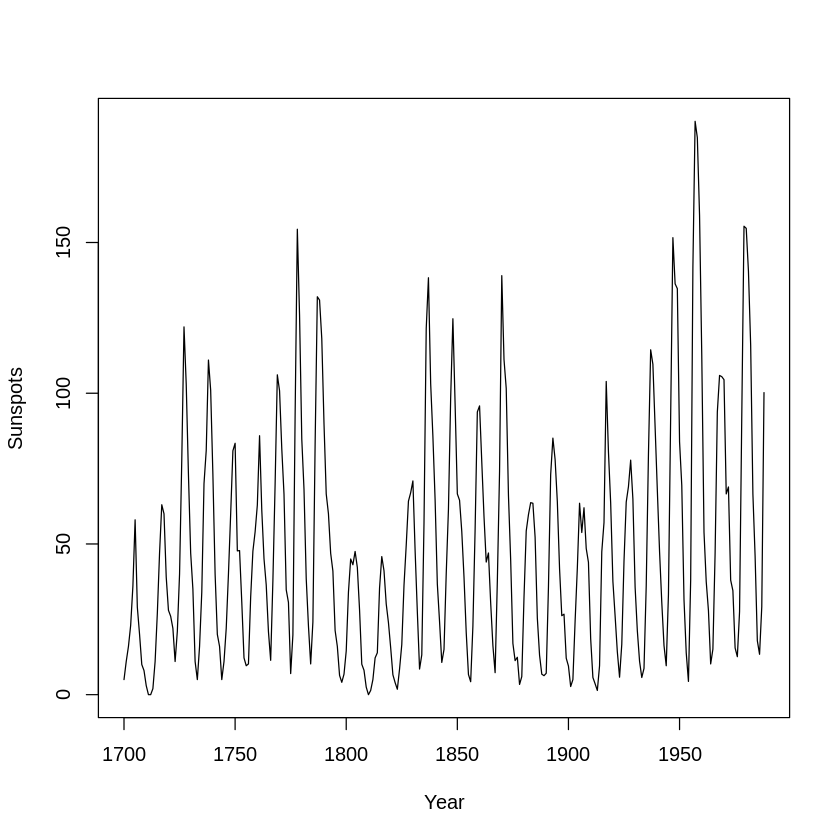

In [ ]:
# Plotar o conjunto de dados
plot(sunspot.year, xlab = "Year", ylab = "Sunspots")

2. Temperatura média global (superficie terrestre e oceanos)

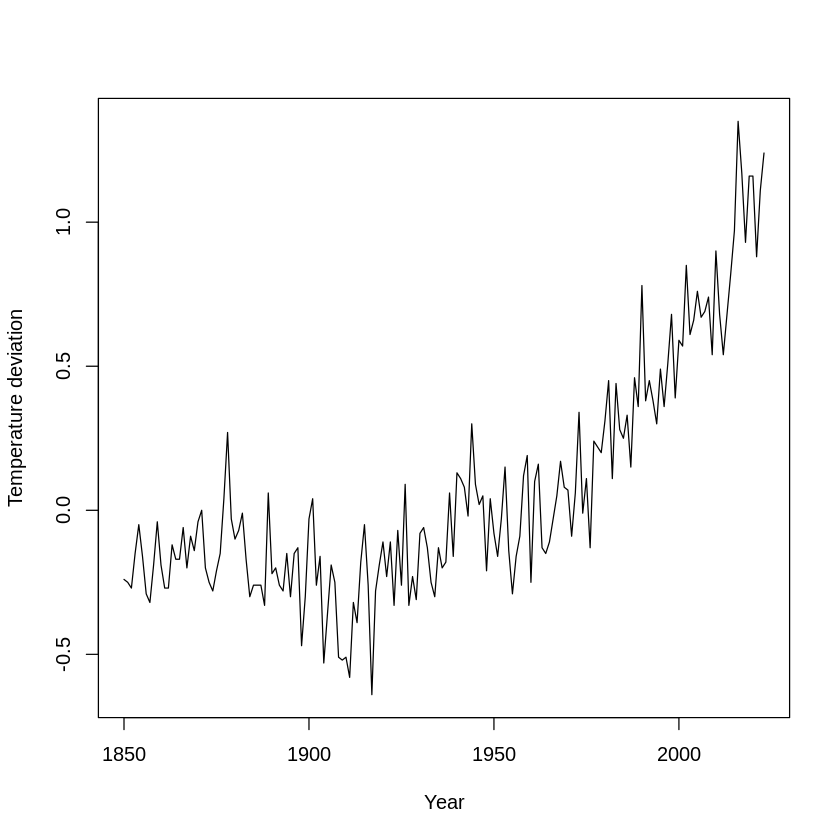

In [ ]:
# Plotar o conjunto de dados
plot(gtemp_both, xlab = "Year", ylab = "Temperature deviation")

**Interpretação:**

Por inspeção, podemos ver:

* Um ciclo de aproximadamente 11 anos nos números de manchas solares, ou seja, os números de manchas solares variam de acordo com o ciclo solar de aproximadamente 11 anos, e
* Um ciclo "mais ruidoso" nos desvios de temperatura entre a Terra e os Oceanos sobrepostos a uma tendência crescente.

**B. Calcular correlação cruzada entre o conjunto de dados**

1. Preselecionar subconjunto de dados (1880 - 1988)

In [ ]:
# Subconjunto de dados para manchas solares
sy2 <- as.numeric(window(sunspot.year, start = 1880, end = 1988))

# Subconjunto de dados para temperatura média global
gt2 <- as.numeric(window(gtemp_both, start = 1880, end = 1988))

2. Cálculo da correlação cruzada

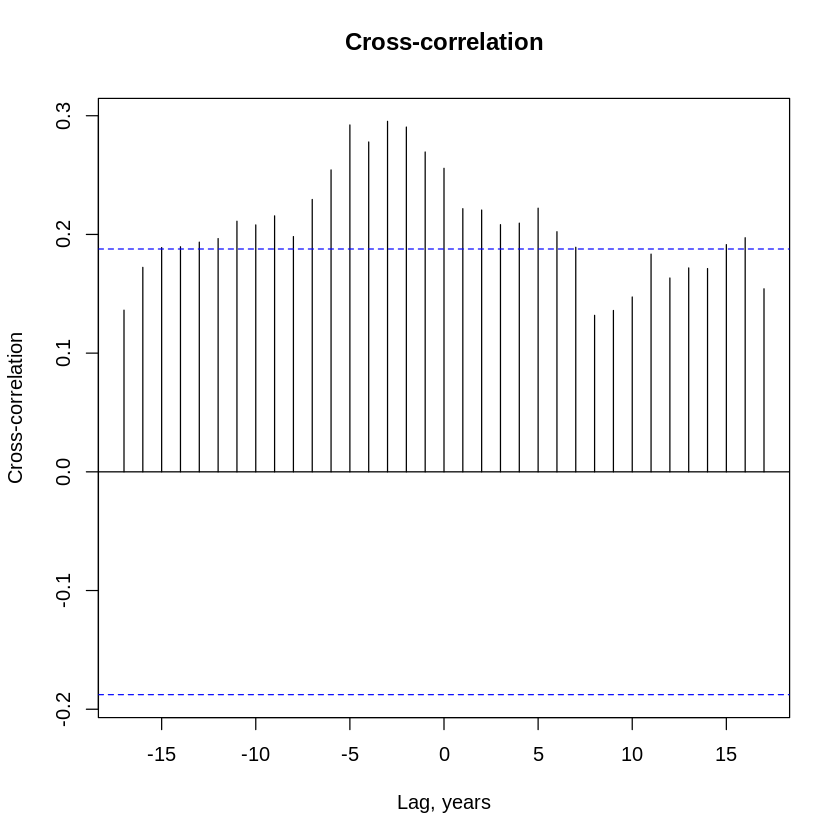

In [ ]:
# Cálculo e plotagem da correlação cruzada
ccf(sy2, gt2, xlab = "Lag, years", ylab = "Cross-correlation", main = 'Cross-correlation')

**Interpretação:**

* A Figura mostra que há uma correlação estatística fraca que atinge seu máximo em temperatura na presença de manchas solares com periodos de 2 anos.

* Embora fraca, ela atinge o pico acima da linha tracejada horizontal que mostra o intervalo de confiança (i.e. padrão para 95%).

* Observe que isso não diz por si só se há um atraso causal da temperatura devido à atividade solar. No máximo, nos diz que se houver uma correlação causal, então é de 2 anos para esses conjuntos de dados específicos.

* Observe também que para a identificação de atrasos em características recorrentes ou periódicas, pode ser apropriado remover tendências dos dados.

### Exemplo 02. Correlação cruzada (sentido oposto) - Irradiância solar e Concentração do isótopo Berilio-10 ($^{10}Be$)

---

**A. Importar e plotar o conjunto de dados**

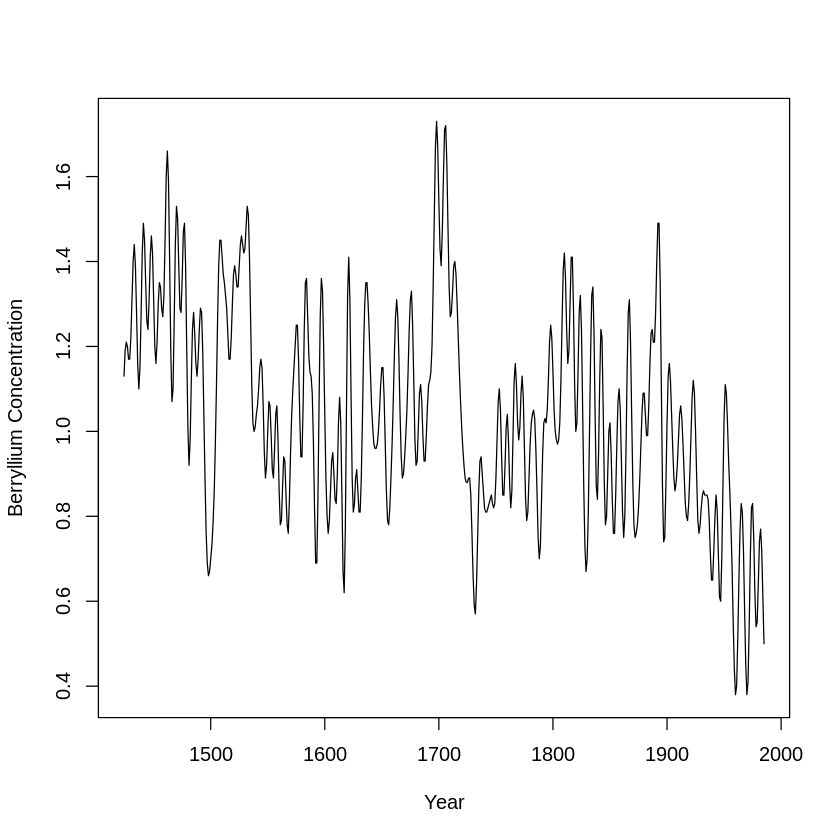

In [ ]:
# Importar conjunto de dados desde biblioteca EMD
data(beryllium)

# Plotar o conjunto de dados
plot(beryllium$year, beryllium$be, type = "l", xlab = "Year", ylab = "Berryllium Concentration")

**B. Calcular correlação cruzada entre o conjunto de dados**

1. Preselecionar subconjunto de dados (1700 - 1985)

In [ ]:
# Subconjunto de dados para manchas solares
sy2 <- as.numeric(window(sunspot.year, start = 1700, end = 1985))

# Subconjunto de dados para variação da concentração do isotopo
be2 <- beryllium$be[beryllium$year >= 1700]

2. Cálculo da correlação cruzada

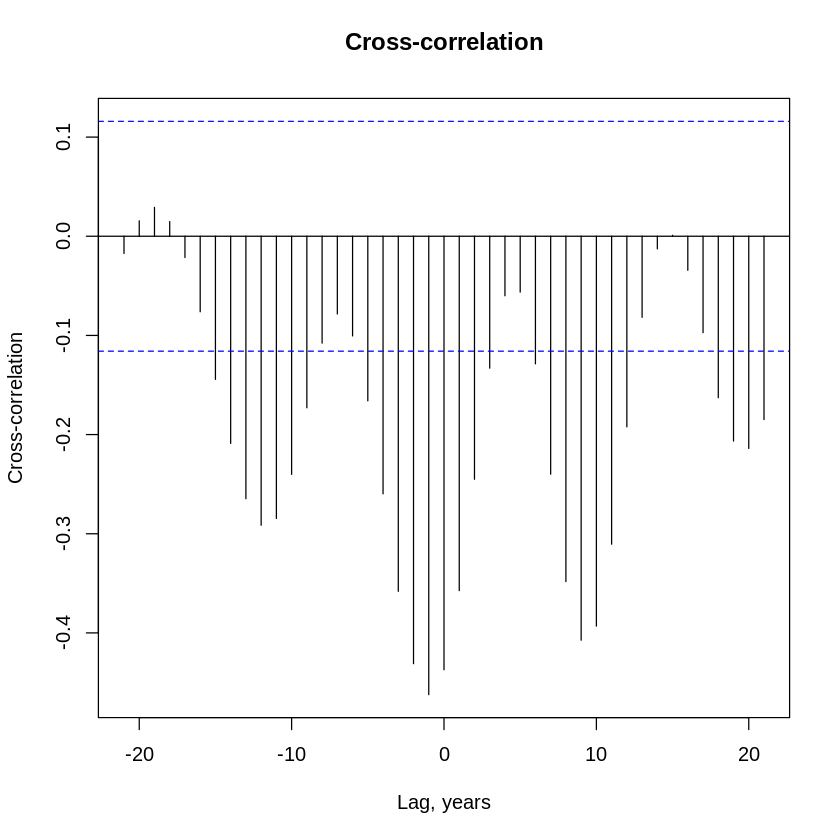

In [ ]:
# Cálculo e plotagem da correlação cruzada
ccf(sy2, be2, xlab = "Lag, years", ylab = "Cross-correlation", main = "Cross-correlation")

**Interpretação:**

* A Figura mostra que há uma correlação estatística média que atinge seu pico máximo (negativo) para um atraso de $^{10}Be$ relacionado com a presença de manchas solares aproximadamente a cada 1 ano.
* Observe que isso não nos diz por si só se há um atraso causal da concentração de  $^{10}Be$ devido à atividade solar. No máximo, nos diz que se houver um atraso causal, então é de 1 ano para esses conjuntos de dados específicos.

## **2.4. Autocorrelação**

A correlação cruzada também pode ser usada para comparar uma série temporal com versões defasadas dela mesma, colocando $y(t) = x(t)$ na Equação de $R\left( k \right)$. Neste caso a equação é chamada de autocorrelação e seu coeficiente pode ser calculado através de:

$$R\left( k \right)=\frac{cov\left( x_{k'},x_{k} \right)}{sd\left( x_{k'} \right)\cdot sd\left( x_{k} \right)}$$

onde a covariância e os desvios padrões se aplicam aos segmentos $x_{k'}$ e $y_{k}$ que se sobrepõem quando $lag=k$ e $-1\le R\left( k \right)\le 1$.

### Exemplo 03. Autocorrelação - Manchas solares
---
**A. Calcular da autocorrelação para o conjunto de dados**

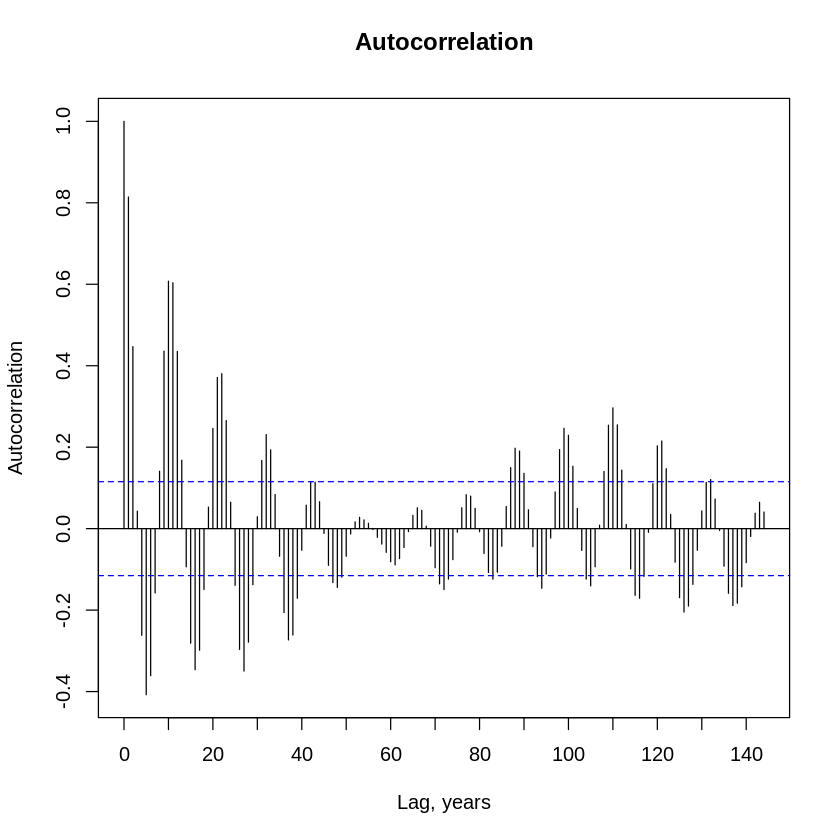

In [ ]:
# Cálculo e plotagem da autocorrelação
acf(as.numeric(sunspot.year), lag.max = 144, xaxp = c(0,140,7), xlab = "Lag, years", ylab = "Autocorrelation", main = "Autocorrelation")

# Definição das marcas do eixo X
axis(1, at = c(10, 30, 50, 70, 90, 110, 130), labels = FALSE)

Importante:

Observe que estamos ajustando o parámetro $lag_{max}$ em conformidade com:

$$lag_{max}=\frac{N-1}{2}=\frac{289-1}{2}=144$$


**Interpretação:**

* A Figura mostra um ciclo claro de aproximadamente 11 anos (ciclo principal), como esperado.
* No entanto, como mostrado pela variação nas magnitudes dos máximos (e mínimos) locais a cada 5 e/ou 6 ciclos derivados do ciclo principal (i.e. 11 anos).
* Também é possivel ver a presença de um ciclo sub-harmônico longo de aproximadamente 110 anos.

### Exemplo 04. Autocorrelação - Temperaturas médias na cidade de Nottingham, UK (Graus Fahrenheit)
---

**A. Importar e plotar o conjunto de dados**

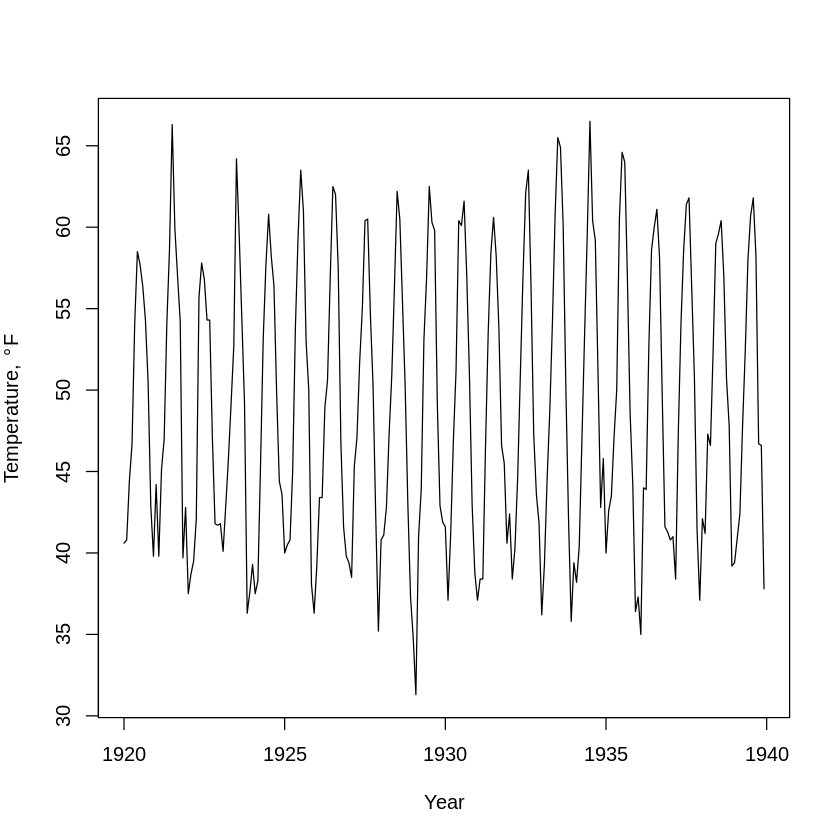

In [ ]:
plot(nottem, xlab = "Year", ylab = expression("Temperature, " * degree * F))

**Interpretação:**

* A Figura mostra um ciclo anual claro que parece ser aproximadamente sinusoidal, notando algumas variações ano a ano (i.e. máximos no verão e mínimos no inverno).
* Visualmente é possivel dizer que os dados são muito mais uniformes ciclo por ciclo quando comparados com os dados de manchas solares
* Note-se que, como no exemplo anterior, estamos ajustando o parámetro $lag_{max}=120$ meses (i.e. 10 anos).

**B. Cálculo da autocorrelação para o conjunto de dados**

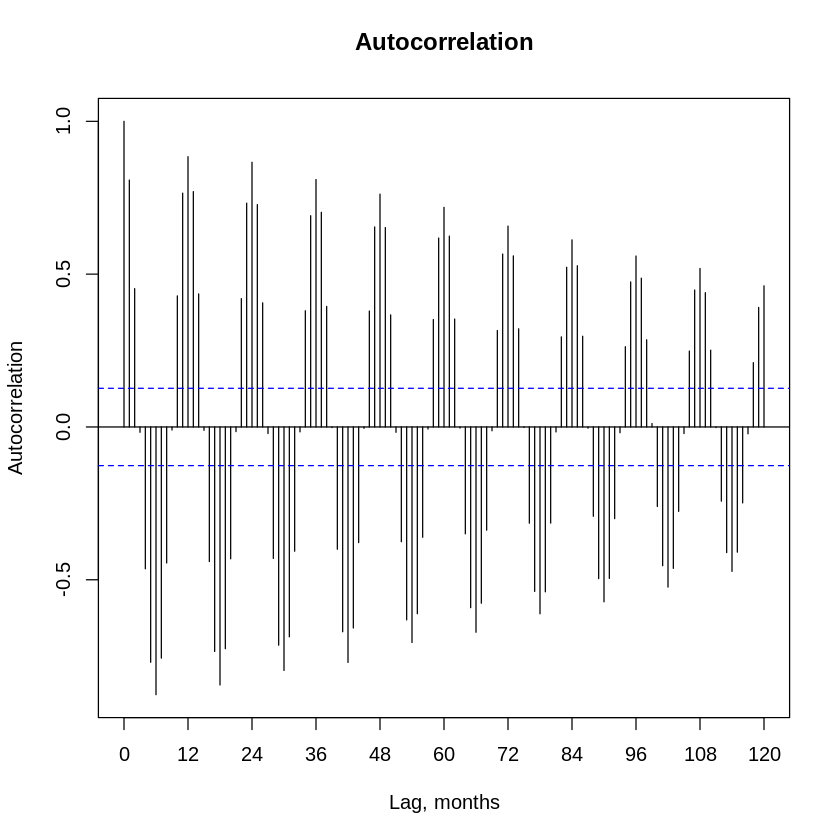

In [ ]:
# Cálculo e plotagem da autocorrelação
acf(as.numeric(nottem), lag.max = 120, xaxp = c(0,120,10), xlab = "Lag, months", ylab = "Autocorrelation", main = "Autocorrelation")

**Interpretação:**

* Conforme mostrado na Figura, a variação no coeficiente de autocorrelação é altamente periódica, como mostrado pelos máximos e mínimos locais regulares em defasagens de 1 ano (12 meses).
* Existe uma diminuição gradual na magnitude desses máximos e mínimos conforme a defasagem aumenta.
* Além disso, e diferente dos dados de manchas solares, não há variações de período longo.

## 2.5. Regressão Linear Simples

Conforme descrito anteriormente, a correlação estatística mede a linearidade de uma relação entre duas variáveis, ou seja, a extensão em que elas são proporcionais entre si, mas não mede diretamente a constante de proporcionalidade. Para fazer isso, precisamos usar a técnica chamada de regressão linear simples.

Se tivermos um par de variáveis ​​de $N$ elementos $x\left( n \right)=\left\{ x_{n} \right\}$ e $y\left( n \right)=\left\{ y_{n} \right\}$, como no caso do conjunto de dados utilizado no cálculo da correlação cruzada, então o modelo de regressão linear simples se ajusta em conformidade com a relação matemática:

$$y\left( n \right)=\alpha+\beta x\left( n \right)+\varepsilon\left( n \right)=\hat{y}\left( n \right)+\varepsilon\left( n \right)$$

de acordo com a melhor linha reta que atravessa os dados, ou seja:

$$\hat{y}\left( n \right)=\alpha+\beta x\left( n \right)$$

onde:

* $\alpha$ e $\beta$ são o intercepto do eixo $y$ e o gradiente da linha de regressão, respectivamente.
* $\hat{y}\left( n \right)=\left\{ \hat{y_{n}} \right\}$ é o conjunto de estimativas da regressão para $y(n)$.
* A variável $\varepsilon\left( n \right)=\left\{ \varepsilon_{n} \right\}$ é o conjunto de resíduos (i.e. erros) entre os valores reais $y(n)$ e as estimativas da regressão  $\hat{y}\left( n \right)$.

Desta maneira, a melhor linha reta, ou seja, a linha de regressão, será aquela linha reta que produz a menor soma dos quadrados dos resíduos.

As fórmulas para $\alpha$ e $\beta$ são:

$$\beta=\frac{cov\left( x,y \right)}{var\left( x \right)}$$

e

$$\alpha=\bar{y}-\beta\bar{x}$$

onde $var\left( x \right)$ é a variância de $x(n)$ e $\bar{x}$ e $\bar{y}$ são as médias aritméticas de $x(n)$ e $y(n)$ respectivamente.

Na regressão linear simples, a qualidade do ajuste é geralmente expressa pelo coeficiente de determinação, $R^{2}$ (R-quadrado), o qual expressa o nivel de ajuste de um modelo estatístico linear generalizado, aos valores observados de uma variável aleatória.

O $R^{2}$ varia entre 0 e 1, por vezes sendo expresso em termos percentuais. Nesse caso, expressa a quantidade da variância dos dados que é explicada pelo modelo linear. Assim, quanto maior o $R^{2}$, mais explicativo é o modelo linear, ou seja, melhor ele se ajusta à amostra.

O coeficiente de determinação, $R^{2}$, pode ser calculado através da equação:

$$R^{2}=1-\frac{var\left( \varepsilon \right)}{var\left( y \right)}=1-\frac{\sum_{n=0}^{N-1}{\left( y_{n}-\hat{y_{n}} \right)}^2}{\sum_{n=0}^{N-1}{\left( y_{n}-\hat{y} \right)}^2}$$



### Exemplo 05. Regressão Linear - Temperaturas médias na cidade de Nottingham
---

Em princípio, é possivel usar o modelo de regressão linear simples para investigar uma possível dependência estatística de uma série temporal, $y(t)$, em uma série temporal de referência, $x(t)$, que contém um sinal periódico ou outra característica que sabemos ou suspeitamos que exista em $y(t)$ de acordo com o modelo:

$$A cos\left( 2\pi f_{k}t-\phi_{k} \right)=A cos\left( \phi_{k} \right)cos\left( 2\pi f_{k}t \right)+A sen\left( \phi_{k} \right)sen\left( 2\pi f_{k}t \right)$$

ou usando o periodo $T_{k}$ do harmônico $k$.

$$A cos\left( 2\pi f_{k}t-\phi_{k} \right)=\alpha_{k} cos\left( \frac{2\pi}{T_{k}}t \right)+\beta_{k} sen\left( \frac{2\pi}{T_{k}}t \right)$$

onde $\alpha_{k}=A cos\left( \phi_{k} \right)$ e $\beta_{k}=A sen\left( \phi_{k} \right)$.

Para ilustrar isto usaremos o conjunto de dados de Temperatura média da cidade de Nottingham, o qual compreende uma lista de 240 valores sequenciais (20 anos, 12 valores mensais por ano).

**A. Criação dos sinais periodicos da série**

Para gerar os sinais periódicos anuais (i.e. $f_{20}=1/12 \to$ 1 ciclo em 12 meses), primeiro é necessário gerar uma base de tempo, $t_{b}=0,1,...,239$. Isto é:

In [ ]:
# Intervalo de tempo
tb <- 0:239

# Criação dos sinais periodicos (seno e cosseno)
ann.cos <- cos(2*pi*(1/12)*tb)
ann.sin <- sin(2*pi*(1/12)*tb)

**B. Cálculo da regressão linear com os sinais periódicos individuais**

1. Sinal periódico seno

In [ ]:
# Cálculo da regressão linear entre o conjunto de dados e o sinal seno
lm.sin <- lm(nottem ~ ann.sin)

# Resumo de informações
summary(lm.sin)


Call:
lm(formula = nottem ~ ann.sin)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.044  -7.467  -0.699   7.858  17.460 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  49.0396     0.5508  89.029   <2e-16 ***
ann.sin      -1.3905     0.7790  -1.785   0.0755 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.533 on 238 degrees of freedom
Multiple R-squared:  0.01321,	Adjusted R-squared:  0.009065 
F-statistic: 3.186 on 1 and 238 DF,  p-value: 0.07552


2. Sinal periódico cosseno

In [ ]:
# Cálculo da regressão linear entre o conjunto de dados e o sinal seno
lm.cos <- lm(nottem ~ ann.cos)

# Resumo de informações
summary(lm.cos)


Call:
lm(formula = nottem ~ ann.cos)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8034 -1.9121 -0.2029  1.8337  6.6966 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  49.0396     0.1759  278.87   <2e-16 ***
ann.cos     -11.4733     0.2487  -46.13   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.724 on 238 degrees of freedom
Multiple R-squared:  0.8994,	Adjusted R-squared:  0.899 
F-statistic:  2128 on 1 and 238 DF,  p-value: < 2.2e-16


**C. Criação do sinal anual**

De acordo com os resultados obtidos, o modelo sinusoidal anual que melhor explica a variação nos dados é:

$$ann.cyc=-11,47 cos\left( 2\pi\frac{1}{12}t \right)-1,39sen\left( 2\pi\frac{1}{12}t \right)+49,04$$

o qual pode ser expresso alternativamente como:

$$ann.cyc=-11,56 cos\left( 2\pi\frac{1}{12}t-0,1206 \right)+49,04$$

In [ ]:
# Criação do sinual periódica anual
ann.cyc <- coef(lm.cos)[2]*cos(2*pi*(1/12)*tb) + coef(lm.sin)[2]*sin(2*pi*(1/12)*tb) + mean(nottem)

**D. Cálculo da regressão linear com o sinal periódico anual**

In [ ]:
# Cálculo da regressão linear entre o conjunto de dados e o sinal seno
lm.ac <- lm(nottem ~ ann.cyc)

# Resumo de informações
summary(lm.ac)


Call:
lm(formula = nottem ~ ann.cyc)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.2072 -1.5872 -0.0034  1.7587  6.6337 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.338e-15  9.971e-01    0.00        1    
ann.cyc     1.000e+00  2.006e-02   49.86   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.539 on 238 degrees of freedom
Multiple R-squared:  0.9126,	Adjusted R-squared:  0.9123 
F-statistic:  2486 on 1 and 238 DF,  p-value: < 2.2e-16


A linha intercepta em 0 e o gradiente é 1, porque construímos uma senóide com amplitude e fase corretas em torno do valor médio.

In [ ]:
confint(lm.ac)

,2.5 %,97.5 %
(Intercept),-1.9641996,1.964200
ann.cyc,0.9604915,1.039509


O intervalo de confiança em torno do gradiente é [0,9605, 1,0395].

Se quisermos o intervalo de confiança em torno da amplitude atual, precisamos multiplicar esses limites de confiança inferior e superior pela amplitude, como segue:

In [ ]:
# Cálculo da amplitude
amp.ac <- sqrt(coef(lm.cos)[2]^2 + coef(lm.sin)[2]^2)

# Cálculo do intervalo de confiança
confint(lm.ac)[2,]*amp.ac

2.5 %   97.5 % 
11.10067 12.01389

Isto revela um intervalo de confiança de 95% de [11.10, 12.01] em torno da amplitude, ou seja, com 95% de confiança, temos $11.10\le \left| A_{20} \right|\le 12.01$ com estimativa central de $\left| A_{20} \right|=11.56$.

Se repetíssemos este procedimento para outras frequências, descobriríamos que a próxima frequência mais importante é $f_{40}$ (i.e. o segundo harmônico anual).